In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [148]:
df = pd.read_excel('./2022년 주요관광지점 입장객통계(전국).xls')
df

# kosis에서 다운받은 파일 불러오기

,시도,군구,관광지,2022년,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월
0,서울특별시,종로구,종묘,286620,12105.0,10240.0,13346.0,26547.0,37010.0,18207.0,13790.0,18387.0,45173.0,44870.0,31545.0,15400.0
1,서울특별시,종로구,창경궁,887806,21843.0,28985.0,45022.0,126568.0,87683.0,53020.0,38468.0,48905.0,126817.0,149244.0,128020.0,33231.0
2,서울특별시,종로구,창덕궁,1186361,34057.0,32513.0,59004.0,155247.0,114759.0,72165.0,57834.0,66682.0,146286.0,201603.0,179741.0,66470.0
3,서울특별시,중구,덕수궁,2696402,127409.0,125728.0,145298.0,255159.0,270905.0,193465.0,176473.0,178381.0,288024.0,395930.0,361095.0,178535.0
4,서울특별시,용산구,국립중앙박물관,3398658,198633.0,171091.0,129276.0,150665.0,345943.0,306036.0,405690.0,471606.0,213145.0,293424.0,341137.0,372012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2739,제주특별자치도,서귀포시,천제연폭포,426372,29630.0,29458.0,27740.0,38534.0,43301.0,38919.0,33616.0,36891.0,33888.0,50804.0,38326.0,25265.0
2740,제주특별자치도,서귀포시,천지연폭포,998867,66349.0,62838.0,54341.0,81245.0,101880.0,99765.0,85625.0,100322.0,88710.0,120348.0,83224.0,54220.0
2741,제주특별자치도,서귀포시,카멜리아힐,450465,79310.0,58085.0,43417.0,68990.0,92459.0,108204.0,NaN,NaN,NaN,NaN,NaN,NaN
2742,제주특별자치도,서귀포시,한화아쿠아플라넷제주,431978,72111.0,65955.0,41984.0,65731.0,86244.0,99953.0,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
df = df[1:]
df = df[df['내/외국인'] == '합계']


df
# 첫 행 버리기
# 외국인, 내국인 방문객 합친 '합계' 데이터만 살리기

,시도,군구,관광지,구분,내/외국인,총계(2022.01~2022.12),2022년,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
3,서울특별시,종로구,경복궁,유료,합계,3382603.0,3382603,76064,70347,76250,227831,519982,259455,167912,201280,531326,647843,369167,235146
6,서울특별시,종로구,종묘,유료,합계,286620.0,286620,12105,10240,13346,26547,37010,18207,13790,18387,45173,44870,31545,15400
9,서울특별시,종로구,창경궁,유료,합계,887806.0,887806,21843,28985,45022,126568,87683,53020,38468,48905,126817,149244,128020,33231
12,서울특별시,종로구,창덕궁,유료,합계,1186361.0,1186361,34057,32513,59004,155247,114759,72165,57834,66682,146286,201603,179741,66470
13,서울특별시,중구,덕수궁,유료,합계,2696402.0,2696402,127409,125728,145298,255159,270905,193465,176473,178381,288024,395930,361095,178535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6681,제주특별자치도,서귀포시,천제연폭포,유료,합계,426372.0,426372,29630,29458,27740,38534,43301,38919,33616,36891,33888,50804,38326,25265
6684,제주특별자치도,서귀포시,천지연폭포,유료,합계,998867.0,998867,66349,62838,54341,81245,101880,99765,85625,100322,88710,120348,83224,54220
6687,제주특별자치도,서귀포시,카멜리아힐,유료,합계,450465.0,450465,79310,58085,43417,68990,92459,108204,0,0,0,0,0,0
6690,제주특별자치도,서귀포시,한화아쿠아플라넷제주,유료,합계,431978.0,431978,72111,65955,41984,65731,86244,99953,0,0,0,0,0,0


In [130]:
df = df.rename(columns= {'Unnamed: 7'  : '01월','Unnamed: 8'  : '02월', 'Unnamed: 9'  : '03월', 'Unnamed: 10'  : '04월', 'Unnamed: 11'  : '05월', 'Unnamed: 12'  : '06월', 'Unnamed: 13'  : '07월', 'Unnamed: 14'  : '08월', 'Unnamed: 15'  : '09월', 'Unnamed: 16'  : '10월', 'Unnamed: 17'  : '11월', 'Unnamed: 18'  : '12월'})
df

# 컬럼명 월로 변경


,시도,군구,관광지,구분,내/외국인,총계(2022.01~2022.12),2022년,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월
3,서울특별시,종로구,경복궁,유료,합계,3382603.0,3382603,76064,70347,76250,227831,519982,259455,167912,201280,531326,647843,369167,235146
6,서울특별시,종로구,종묘,유료,합계,286620.0,286620,12105,10240,13346,26547,37010,18207,13790,18387,45173,44870,31545,15400
9,서울특별시,종로구,창경궁,유료,합계,887806.0,887806,21843,28985,45022,126568,87683,53020,38468,48905,126817,149244,128020,33231
12,서울특별시,종로구,창덕궁,유료,합계,1186361.0,1186361,34057,32513,59004,155247,114759,72165,57834,66682,146286,201603,179741,66470
13,서울특별시,중구,덕수궁,유료,합계,2696402.0,2696402,127409,125728,145298,255159,270905,193465,176473,178381,288024,395930,361095,178535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6681,제주특별자치도,서귀포시,천제연폭포,유료,합계,426372.0,426372,29630,29458,27740,38534,43301,38919,33616,36891,33888,50804,38326,25265
6684,제주특별자치도,서귀포시,천지연폭포,유료,합계,998867.0,998867,66349,62838,54341,81245,101880,99765,85625,100322,88710,120348,83224,54220
6687,제주특별자치도,서귀포시,카멜리아힐,유료,합계,450465.0,450465,79310,58085,43417,68990,92459,108204,0,0,0,0,0,0
6690,제주특별자치도,서귀포시,한화아쿠아플라넷제주,유료,합계,431978.0,431978,72111,65955,41984,65731,86244,99953,0,0,0,0,0,0


In [131]:
df = df.reset_index(drop=True)
df

# 인덱스 리셋

,시도,군구,관광지,구분,내/외국인,총계(2022.01~2022.12),2022년,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월
0,서울특별시,종로구,경복궁,유료,합계,3382603.0,3382603,76064,70347,76250,227831,519982,259455,167912,201280,531326,647843,369167,235146
1,서울특별시,종로구,종묘,유료,합계,286620.0,286620,12105,10240,13346,26547,37010,18207,13790,18387,45173,44870,31545,15400
2,서울특별시,종로구,창경궁,유료,합계,887806.0,887806,21843,28985,45022,126568,87683,53020,38468,48905,126817,149244,128020,33231
3,서울특별시,종로구,창덕궁,유료,합계,1186361.0,1186361,34057,32513,59004,155247,114759,72165,57834,66682,146286,201603,179741,66470
4,서울특별시,중구,덕수궁,유료,합계,2696402.0,2696402,127409,125728,145298,255159,270905,193465,176473,178381,288024,395930,361095,178535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2739,제주특별자치도,서귀포시,천제연폭포,유료,합계,426372.0,426372,29630,29458,27740,38534,43301,38919,33616,36891,33888,50804,38326,25265
2740,제주특별자치도,서귀포시,천지연폭포,유료,합계,998867.0,998867,66349,62838,54341,81245,101880,99765,85625,100322,88710,120348,83224,54220
2741,제주특별자치도,서귀포시,카멜리아힐,유료,합계,450465.0,450465,79310,58085,43417,68990,92459,108204,0,0,0,0,0,0
2742,제주특별자치도,서귀포시,한화아쿠아플라넷제주,유료,합계,431978.0,431978,72111,65955,41984,65731,86244,99953,0,0,0,0,0,0


In [132]:
df

summer = df.loc[:, ['06월', '07월', '08월']]


winter = df.loc[:, ['12월', '01월', '02월']]


spring = df.loc[:, ['03월', '04월', '05월']]


fall = df.loc[:, ['09월', '10월', '11월']]

fall

# 계절별 월 입장객수 데이터 리스트화

,09월,10월,11월
0,531326,647843,369167
1,45173,44870,31545
2,126817,149244,128020
3,146286,201603,179741
4,288024,395930,361095
...,...,...,...
2739,33888,50804,38326
2740,88710,120348,83224
2741,0,0,0
2742,0,0,0


In [133]:
lst_winter = []

for i in range(len(winter['12월'])) :
    lst_winter.append(winter['12월'][i] + winter['01월'][i] + winter['02월'][i])

lst_winter = pd.DataFrame(lst_winter)

print(lst_winter)


# 관광지의 겨울 월별 입장객수 꺼내와서 더하기

           0
0     381557
1      37745
2      84059
3     133040
4     431672
...      ...
2739   84353
2740  183407
2741  137395
2742  138066
2743    8462

[2744 rows x 1 columns]


In [134]:
lst_spring = []

for i in range(len(spring['03월'])) :
    lst_spring.append(spring['03월'][i] + spring['04월'][i] + spring['05월'][i])

lst_spring = pd.DataFrame(lst_spring)

print(lst_spring)

# 관광지의 봄 월별 입장객수 꺼내와서 더하기

           0
0     824063
1      76903
2     259273
3     329010
4     671362
...      ...
2739  109575
2740  237466
2741  204866
2742  193959
2743   12481

[2744 rows x 1 columns]


In [135]:
lst_summer = []

for i in range(len(summer['06월'])) :
    lst_summer.append(summer['06월'][i] + summer['07월'][i] + summer['08월'][i])

lst_summer = pd.DataFrame(lst_summer)

print(lst_summer)

# 관광지의 여름 월별 입장객수 꺼내와서 더하기

           0
0     628647
1      50384
2     140393
3     196681
4     548319
...      ...
2739  109426
2740  285712
2741  108204
2742   99953
2743   13313

[2744 rows x 1 columns]


In [136]:
lst_fall = []

for i in range(len(fall['09월'])) :
    lst_fall.append(fall['09월'][i] + fall['10월'][i] + fall['11월'][i])

lst_fall = pd.DataFrame(lst_fall)

print(lst_fall)

# 관광지의 가을 월별 입장객수 꺼내와서 더하기

            0
0     1548336
1      121588
2      404081
3      527630
4     1045049
...       ...
2739   123018
2740   292282
2741        0
2742        0
2743     4196

[2744 rows x 1 columns]


In [137]:
df_season = pd.concat([df, lst_spring], axis = 1)

df_season = df_season.rename(columns= {0 : '봄'})
df_season


# 위에 만든 봄 데이터 원본 데이터와 합치기
# 컬럼명 '봄'으로 변경


,시도,군구,관광지,구분,내/외국인,총계(2022.01~2022.12),2022년,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월,봄
0,서울특별시,종로구,경복궁,유료,합계,3382603.0,3382603,76064,70347,76250,227831,519982,259455,167912,201280,531326,647843,369167,235146,824063
1,서울특별시,종로구,종묘,유료,합계,286620.0,286620,12105,10240,13346,26547,37010,18207,13790,18387,45173,44870,31545,15400,76903
2,서울특별시,종로구,창경궁,유료,합계,887806.0,887806,21843,28985,45022,126568,87683,53020,38468,48905,126817,149244,128020,33231,259273
3,서울특별시,종로구,창덕궁,유료,합계,1186361.0,1186361,34057,32513,59004,155247,114759,72165,57834,66682,146286,201603,179741,66470,329010
4,서울특별시,중구,덕수궁,유료,합계,2696402.0,2696402,127409,125728,145298,255159,270905,193465,176473,178381,288024,395930,361095,178535,671362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2739,제주특별자치도,서귀포시,천제연폭포,유료,합계,426372.0,426372,29630,29458,27740,38534,43301,38919,33616,36891,33888,50804,38326,25265,109575
2740,제주특별자치도,서귀포시,천지연폭포,유료,합계,998867.0,998867,66349,62838,54341,81245,101880,99765,85625,100322,88710,120348,83224,54220,237466
2741,제주특별자치도,서귀포시,카멜리아힐,유료,합계,450465.0,450465,79310,58085,43417,68990,92459,108204,0,0,0,0,0,0,204866
2742,제주특별자치도,서귀포시,한화아쿠아플라넷제주,유료,합계,431978.0,431978,72111,65955,41984,65731,86244,99953,0,0,0,0,0,0,193959


In [138]:
df_season = pd.concat([df_season, lst_summer], axis = 1)

df_season = df_season.rename(columns= {0 : '여름'})
df_season

# 위에 만든 여름 데이터 원본 데이터와 합치기
# 컬럼명 '여름'으로 변경


,시도,군구,관광지,구분,내/외국인,총계(2022.01~2022.12),2022년,01월,02월,03월,...,05월,06월,07월,08월,09월,10월,11월,12월,봄,여름
0,서울특별시,종로구,경복궁,유료,합계,3382603.0,3382603,76064,70347,76250,...,519982,259455,167912,201280,531326,647843,369167,235146,824063,628647
1,서울특별시,종로구,종묘,유료,합계,286620.0,286620,12105,10240,13346,...,37010,18207,13790,18387,45173,44870,31545,15400,76903,50384
2,서울특별시,종로구,창경궁,유료,합계,887806.0,887806,21843,28985,45022,...,87683,53020,38468,48905,126817,149244,128020,33231,259273,140393
3,서울특별시,종로구,창덕궁,유료,합계,1186361.0,1186361,34057,32513,59004,...,114759,72165,57834,66682,146286,201603,179741,66470,329010,196681
4,서울특별시,중구,덕수궁,유료,합계,2696402.0,2696402,127409,125728,145298,...,270905,193465,176473,178381,288024,395930,361095,178535,671362,548319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2739,제주특별자치도,서귀포시,천제연폭포,유료,합계,426372.0,426372,29630,29458,27740,...,43301,38919,33616,36891,33888,50804,38326,25265,109575,109426
2740,제주특별자치도,서귀포시,천지연폭포,유료,합계,998867.0,998867,66349,62838,54341,...,101880,99765,85625,100322,88710,120348,83224,54220,237466,285712
2741,제주특별자치도,서귀포시,카멜리아힐,유료,합계,450465.0,450465,79310,58085,43417,...,92459,108204,0,0,0,0,0,0,204866,108204
2742,제주특별자치도,서귀포시,한화아쿠아플라넷제주,유료,합계,431978.0,431978,72111,65955,41984,...,86244,99953,0,0,0,0,0,0,193959,99953


In [139]:
df_season = pd.concat([df_season, lst_fall], axis = 1)

df_season = df_season.rename(columns= {0 : '가을'})
df_season

# 위에 만든 가을 데이터 원본 데이터와 합치기
# 컬럼명 '가을'로 변경


,시도,군구,관광지,구분,내/외국인,총계(2022.01~2022.12),2022년,01월,02월,03월,...,06월,07월,08월,09월,10월,11월,12월,봄,여름,가을
0,서울특별시,종로구,경복궁,유료,합계,3382603.0,3382603,76064,70347,76250,...,259455,167912,201280,531326,647843,369167,235146,824063,628647,1548336
1,서울특별시,종로구,종묘,유료,합계,286620.0,286620,12105,10240,13346,...,18207,13790,18387,45173,44870,31545,15400,76903,50384,121588
2,서울특별시,종로구,창경궁,유료,합계,887806.0,887806,21843,28985,45022,...,53020,38468,48905,126817,149244,128020,33231,259273,140393,404081
3,서울특별시,종로구,창덕궁,유료,합계,1186361.0,1186361,34057,32513,59004,...,72165,57834,66682,146286,201603,179741,66470,329010,196681,527630
4,서울특별시,중구,덕수궁,유료,합계,2696402.0,2696402,127409,125728,145298,...,193465,176473,178381,288024,395930,361095,178535,671362,548319,1045049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2739,제주특별자치도,서귀포시,천제연폭포,유료,합계,426372.0,426372,29630,29458,27740,...,38919,33616,36891,33888,50804,38326,25265,109575,109426,123018
2740,제주특별자치도,서귀포시,천지연폭포,유료,합계,998867.0,998867,66349,62838,54341,...,99765,85625,100322,88710,120348,83224,54220,237466,285712,292282
2741,제주특별자치도,서귀포시,카멜리아힐,유료,합계,450465.0,450465,79310,58085,43417,...,108204,0,0,0,0,0,0,204866,108204,0
2742,제주특별자치도,서귀포시,한화아쿠아플라넷제주,유료,합계,431978.0,431978,72111,65955,41984,...,99953,0,0,0,0,0,0,193959,99953,0


In [140]:
df_season = pd.concat([df_season, lst_winter], axis = 1)

df_season = df_season.rename(columns= {0 : '겨울'})
df_season

# 위에 만든 겨울 데이터 원본 데이터와 합치기
# 컬럼명 '겨울'으로 변경


,시도,군구,관광지,구분,내/외국인,총계(2022.01~2022.12),2022년,01월,02월,03월,...,07월,08월,09월,10월,11월,12월,봄,여름,가을,겨울
0,서울특별시,종로구,경복궁,유료,합계,3382603.0,3382603,76064,70347,76250,...,167912,201280,531326,647843,369167,235146,824063,628647,1548336,381557
1,서울특별시,종로구,종묘,유료,합계,286620.0,286620,12105,10240,13346,...,13790,18387,45173,44870,31545,15400,76903,50384,121588,37745
2,서울특별시,종로구,창경궁,유료,합계,887806.0,887806,21843,28985,45022,...,38468,48905,126817,149244,128020,33231,259273,140393,404081,84059
3,서울특별시,종로구,창덕궁,유료,합계,1186361.0,1186361,34057,32513,59004,...,57834,66682,146286,201603,179741,66470,329010,196681,527630,133040
4,서울특별시,중구,덕수궁,유료,합계,2696402.0,2696402,127409,125728,145298,...,176473,178381,288024,395930,361095,178535,671362,548319,1045049,431672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2739,제주특별자치도,서귀포시,천제연폭포,유료,합계,426372.0,426372,29630,29458,27740,...,33616,36891,33888,50804,38326,25265,109575,109426,123018,84353
2740,제주특별자치도,서귀포시,천지연폭포,유료,합계,998867.0,998867,66349,62838,54341,...,85625,100322,88710,120348,83224,54220,237466,285712,292282,183407
2741,제주특별자치도,서귀포시,카멜리아힐,유료,합계,450465.0,450465,79310,58085,43417,...,0,0,0,0,0,0,204866,108204,0,137395
2742,제주특별자치도,서귀포시,한화아쿠아플라넷제주,유료,합계,431978.0,431978,72111,65955,41984,...,0,0,0,0,0,0,193959,99953,0,138066


In [141]:
df1 = df_season.iloc[:,0:3]
df2 = df_season.iloc[:,7:]

df_season = pd.concat([df1, df2], axis=1)
df_season

# 불필요한 컬럼 삭제 - 구분, 내/외국인 총계(2022.01~2022.12) 

,시도,군구,관광지,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월,봄,여름,가을,겨울
0,서울특별시,종로구,경복궁,76064,70347,76250,227831,519982,259455,167912,201280,531326,647843,369167,235146,824063,628647,1548336,381557
1,서울특별시,종로구,종묘,12105,10240,13346,26547,37010,18207,13790,18387,45173,44870,31545,15400,76903,50384,121588,37745
2,서울특별시,종로구,창경궁,21843,28985,45022,126568,87683,53020,38468,48905,126817,149244,128020,33231,259273,140393,404081,84059
3,서울특별시,종로구,창덕궁,34057,32513,59004,155247,114759,72165,57834,66682,146286,201603,179741,66470,329010,196681,527630,133040
4,서울특별시,중구,덕수궁,127409,125728,145298,255159,270905,193465,176473,178381,288024,395930,361095,178535,671362,548319,1045049,431672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2739,제주특별자치도,서귀포시,천제연폭포,29630,29458,27740,38534,43301,38919,33616,36891,33888,50804,38326,25265,109575,109426,123018,84353
2740,제주특별자치도,서귀포시,천지연폭포,66349,62838,54341,81245,101880,99765,85625,100322,88710,120348,83224,54220,237466,285712,292282,183407
2741,제주특별자치도,서귀포시,카멜리아힐,79310,58085,43417,68990,92459,108204,0,0,0,0,0,0,204866,108204,0,137395
2742,제주특별자치도,서귀포시,한화아쿠아플라넷제주,72111,65955,41984,65731,86244,99953,0,0,0,0,0,0,193959,99953,0,138066


In [142]:
df_season = pd.DataFrame(df_season)
df_season.to_excel('df_season.xlsx')

# 엑셀 파일로 내보내기

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams['font.family'] = 'malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

# 그림 그리는데 필요한 라이브러리 import


df = pd.read_excel('./df_season_final.xlsx')
df
# 데이터 저장


,0,시도,군구,관광지명,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월,봄,여름,가을,겨울
0,0,강원도,원주시,간현관광지 나오라쇼,0,0,0,0,0,0,0,1566,0,10195,0,0,0,1566,10195,0
1,1,강원도,태백시,365세이프타운,3799,3061,1193,2949,7232,5384,6909,12028,6158,8727,6798,4447,11374,24321,21683,11307
2,2,강원도,홍천군,가리산자연휴양림,3706,3513,2090,4382,6233,6467,9497,10235,6726,8568,5370,4181,12705,26199,20664,11400
3,3,강원도,정선군,가리왕산자연휴양림,3215,2403,662,0,8814,9093,13598,16963,7324,10370,2702,1598,9476,39654,20396,7216
4,4,강원도,화천군,감성테마문학공원,107,76,140,367,370,278,362,378,164,205,272,79,877,1018,641,262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2279,2279,충청북도,옥천군,향수호수길,3696,4345,3728,1929,4986,5522,4180,3908,5362,6624,4339,2571,10643,13610,16325,10612
2280,2280,충청북도,청주시,현도오토캠핑장,1997,1732,1741,2469,2534,1783,1049,1103,2488,2810,1629,1801,6744,3935,6927,5530
2281,2281,충청북도,충주시,활옥동굴,19380,19070,16613,24339,35581,43058,63487,74377,29884,40694,22274,16475,76533,180922,92852,54925
2282,2282,충청북도,단양군,황정산자연휴양림,2755,2587,1792,3962,4754,4939,6864,8533,5495,7327,3993,2406,10508,20336,16815,7748


## 한 파이로 상위 5개의 관광지를 표현할 수 있는 경우

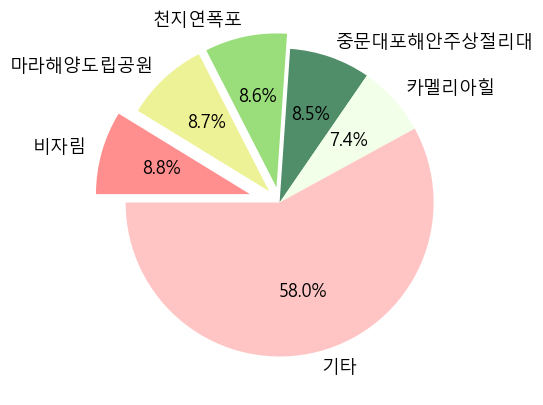

In [4]:
jeju = df[(df['시도'] == '제주특별자치도')]
jeju_spring = jeju.sort_values('봄', ascending=False)
jeju_top = jeju_spring.head()
jeju_top_name = list(jeju_top['관광지명'])
jeju_top_name.append('기타')
jeju_top_name

# 제주도 봄 관광지 상위 5개 및 기타 리스트 뽑기



result = jeju_spring['봄']
result = list(result)
result_top = result[0:5]
result_top

# 제주도 봄 상위 5개 관광지 방문객수 뽑기

result_low = result[6:]
sum = 0

for i in result_low :
    sum += i

result_top.append(sum)
result_top

# 나머지 하위 관광지 방문객수 전체 합하기

colors = ['#FF8F8F', '#EEF296', '#9ADE7B', '#508D69', '#F2FFE9', '#FFC5C5']


plt.figure(figsize=(5,5))
plt.pie(result_top, labels=jeju_top_name, colors=colors, autopct= '%.1f%%', counterclock=False, startangle=180, explode= [0.2, 0.1, 0.1, 0, 0, 0], textprops={'size' :13})

plt.show()


# 파이차트 작성

In [5]:
sudogun = df[(df['시도'] == '서울특별시') | (df['시도'] == '경기도') | (df['시도'] == '인천광역시')]
sudogun_winter = sudogun.sort_values('겨울', ascending= False)
sudogun_winter_top = list(sudogun_winter['겨울'][0:5])

# 수도권 겨울 상위 5개의 관광지 추출하기

summ = 0
for i in sudogun_winter_top :
    summ += i


# 수도권 겨울 상위 5개의 전체 관광객 수 누적합


sudogun_winter_low = list(sudogun_winter['겨울'][5:])

# 수도권 겨울 상위 5개의 관광지를 제외한 나머지 관광지


summ1 = 0
for i in sudogun_winter_low :
    summ1 += i

# 수도권 겨울 상위 5개의 관광지 제외한 나머지 관광지 누적합 

names = ['상위 5위', '기타']
values = [summ, summ1]

# 이름과 값 리스트로 각각 저장


In [6]:
sudogun = df[(df['시도'] == '서울특별시') | (df['시도'] == '경기도') | (df['시도'] == '인천광역시')]
sudogun_winter = sudogun.sort_values('겨울', ascending=False)
sudogun_top = sudogun_winter.head()
sudogun_top_name = list(sudogun_top['관광지명'])

print(sudogun_top_name)

# 수도권 겨울 상위 5개의 관광지명 추출


result = sudogun_winter['겨울']
result = list(result)
result_top = result[0:5]

# 수도권 겨울 상위 5개의 관광지 관광객수 추출
result_top


['오이도', '롯데월드', '국립중앙박물관', '에버랜드', '덕수궁']


[1540438, 1078203, 741736, 649137, 431672]

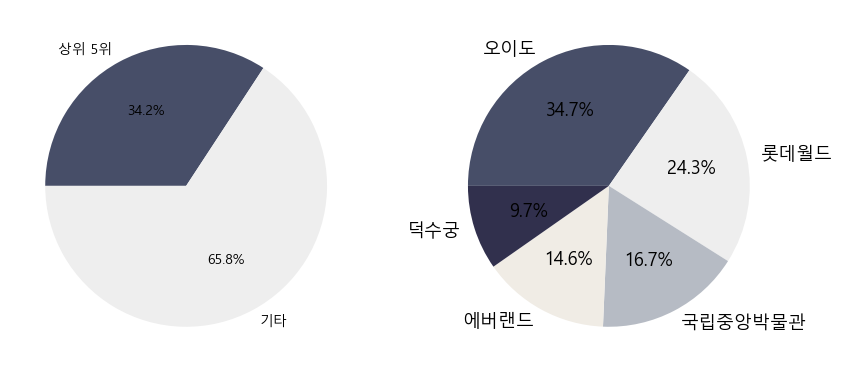

In [7]:
colors = ['#474E68', '#EEEEEE', '#B6BBC4', '#F0ECE5', '#31304D', '#445069']
plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
plt.pie(values, labels=names, colors=colors, autopct= '%.1f%%', counterclock=False, startangle=180, textprops={'size' :10})


#그래프 그리기 

 
plt.subplot(1, 2, 2)
plt.pie(result_top, labels=sudogun_top_name, colors=colors, autopct= '%.1f%%', counterclock=False, startangle=180, textprops={'size' :13})

plt.show()

# 오이도가 결과값이 다른 이유 ) 데이터 원본을 만질 때 '오이도'로 시작하는 곳은 합쳤음